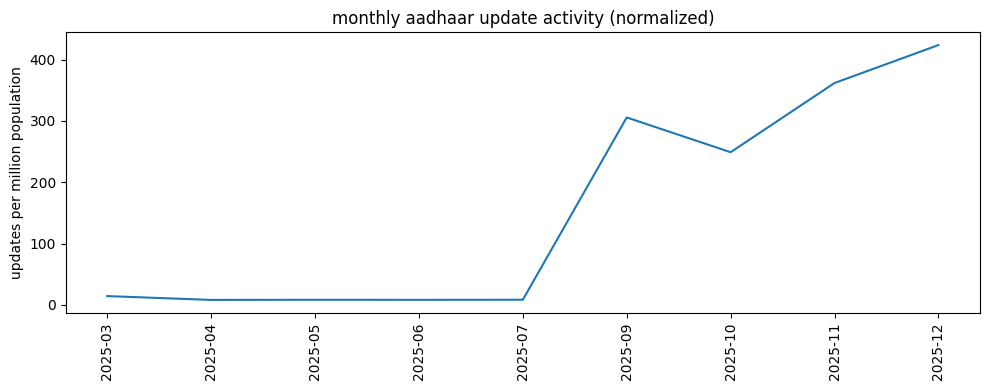

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# updates
demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=pd.concat([demo,bio])
updates["date"]=pd.to_datetime(updates["date"])
updates["month"]=updates["date"].dt.to_period("M").astype(str)

monthly_updates=updates.groupby("month").size().reset_index(name="updates")

# population
population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population["population"]=population["Population 2025"].astype(str).str.replace(",","").astype(int)
total_population=population["population"].sum()

monthly_updates["updates_per_million"]=(monthly_updates["updates"]/total_population)*1_000_000

plt.figure(figsize=(10,4))
plt.plot(monthly_updates["month"],monthly_updates["updates_per_million"])
plt.xticks(rotation=90)
plt.ylabel("updates per million population")
plt.title("monthly aadhaar update activity (normalized)")
plt.tight_layout()
plt.show()
